In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Client 3: SportsStats (Olympics Dataset - 120 years of data)
## SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights 
## to help their partners.
## Insights could be patterns/trends highlighting certain groups/events/countries, etc. 
## for the purpose of developing a news story or discovering key health insights.

In [3]:
## Step 1: Preparing for Your Proposal

## You will document your preparation in developing the project proposal. This includes:

##    Which client/dataset did you select and why?

##    Describe the steps you took to import and clean the data.

##    Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

##    Create an ERD or proposed ERD to show the relationships of the data you are exploring. 



In [4]:
df_athlete_events = pd.read_csv("data/athlete_events.csv")
df_noc_regions = pd.read_csv("data/noc_regions.csv")

In [5]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df_noc_regions.head() # NOC :  National Olympic Committee (3-letter code)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Data Cleaning

In [7]:
# data integration
df_final = pd.merge(df_athlete_events,df_noc_regions,'inner',on='NOC')
df_final.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [8]:
# Null values

df_final.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [9]:
# Handling region null values, using NOC values

## eg, given NOC == CHN, if region is NULL put region = CHINA

In [10]:
# medal unknown values, replace it with 0 or didn't win

df_final['Medal'] = df_final['Medal'].fillna(0)

In [11]:
# Handling null values : Height, Weight, Age

df_final.dropna(subset=['Height','Weight','Age'], inplace=True)

In [12]:
df_final.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        16
notes     202418
dtype: int64

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205911 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      205911 non-null  int64  
 1   Name    205911 non-null  object 
 2   Sex     205911 non-null  object 
 3   Age     205911 non-null  float64
 4   Height  205911 non-null  float64
 5   Weight  205911 non-null  float64
 6   Team    205911 non-null  object 
 7   NOC     205911 non-null  object 
 8   Games   205911 non-null  object 
 9   Year    205911 non-null  int64  
 10  Season  205911 non-null  object 
 11  City    205911 non-null  object 
 12  Sport   205911 non-null  object 
 13  Event   205911 non-null  object 
 14  Medal   205911 non-null  object 
 15  region  205895 non-null  object 
 16  notes   3493 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 28.3+ MB


In [14]:
df_final.describe()

,ID,Age,Height,Weight,Year
count,205911.000000,205911.000000,205911.000000,205911.000000,205911.000000
mean,68598.171924,25.057797,175.377425,70.695325,1989.663262
std,38993.266878,5.481388,10.547082,14.342344,20.134386
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35177.000000,21.000000,168.000000,60.000000,1976.000000
50%,68607.000000,24.000000,175.000000,70.000000,1992.000000
75%,102286.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [15]:
df_final.duplicated().sum()

13

In [16]:
df_final.drop_duplicates(inplace=True)
df_final.duplicated().sum()

0

### Initial Exploration

In [17]:
# gender distribution

df_final.groupby(['Sex'])['ID'].count().sort_values(ascending = False).to_frame(name ='Population').reset_index()

,Sex,Population
0,M,139301
1,F,66597


In [18]:
# initial explorations | some of the stats you are looking at

df_final[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,205898.000000,205898.000000,205898.00000
mean,25.057023,175.377532,70.69532
std,5.479969,10.546810,14.34264
min,11.000000,127.000000,25.00000
25%,21.000000,168.000000,60.00000
50%,24.000000,175.000000,70.00000
75%,28.000000,183.000000,79.00000
max,71.000000,226.000000,214.00000


In [21]:
## ERD

from pandaserd import ERD
# erd = ERD()
# t1 = erd.add_table(df_athlete_events, 'NOC', bg_color='pink')
# t2 = erd.add_table(df_noc_regions, 'NOC', bg_color='skyblue')
# erd.create_rel('athelete_events', 'noc_regions', on='athelete_events', right_cardinality='*')
# erd.create_rel('athelete_events', 'noc_regions', left_on='NOC', right_on='NOC', left_cardinality='+', right_cardinality='+')

# erd.write_to_file('output.txt')

### Step - 2

In [22]:
## Step 2: Develop Project Proposal | In this step, you will need to include the following:

## 1. Description
## Write a 5-6 sentence paragraph describing your project; include who might be interested to learn about your findings. Who might be your audience?



## 2. Questions
## Create 2-3 questions that you want to answer with the data:



## 3. Hypothesis
## What are your initial hypotheses about the data?
## Write 2-3 assumptions about the data that you'll want to go back to prove or disprove. You will want to keep them in front of you as you look at the data to keep them or change them. You may see relationships that you want to explore and will develop a "belief" about the data.  
##    Start documenting what you think you can tell from the data. 
##    What pops up as interesting to you? Most likely it will be interesting to others as well.
##    Use the discussion boards to discuss with others about your client and the data to brainstorm together.


## 4. Approach
## Describe in 5-6 sentences what approach you are going to take in order to prove (or disprove) your hypotheses. Think about the following in your answer:  
##    What features (fields/columns) are you going to look at first?
##    Is there a relationship that exists that you want to explore?
##    What metric/ evaluation measure will you use?

### Week 2

    <!-- 
    Provide a summary of the different descriptive statistics you looked at and WHY.

    Submit 2-3 key points you may have discovered about the data, e.g. new relationships? 
    Aha's! Did you come up with additional ideas for other things to review?

    Soln. Different seasons means different sports (this thing didm't strike me earlier),
    Number of athletes in different sports,
    

    Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

    What additional questions are you seeking to answer?
    
    -->

In [23]:
df_final[['Age','Height', 'Weight']].describe()

,Age,Height,Weight
count,205898.000000,205898.000000,205898.00000
mean,25.057023,175.377532,70.69532
std,5.479969,10.546810,14.34264
min,11.000000,127.000000,25.00000
25%,21.000000,168.000000,60.00000
50%,24.000000,175.000000,70.00000
75%,28.000000,183.000000,79.00000
max,71.000000,226.000000,214.00000


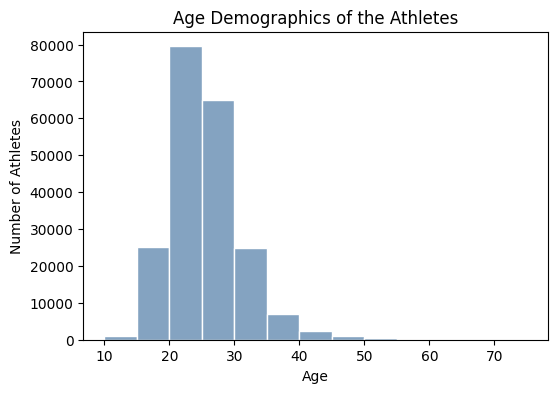

In [24]:
#Age Demographics of the Athletes
plt.figure(figsize=(6, 4))
plt.title("Age Demographics of the Athletes")
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.hist(df_final.Age, bins = np.arange(10,80,5), color=(0.2, 0.4, 0.6, 0.6), edgecolor='white')
plt.show()


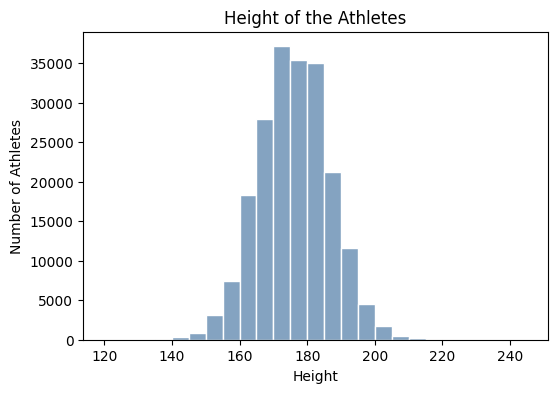

In [25]:
#Height Demographics of the Athletes
plt.figure(figsize=(6, 4))
plt.title("Height of the Athletes")
plt.xlabel('Height')
plt.ylabel('Number of Athletes')
plt.hist(df_final.Height, bins = np.arange(120,250,5), color=(0.2, 0.4, 0.6, 0.6), edgecolor='white')
plt.show()

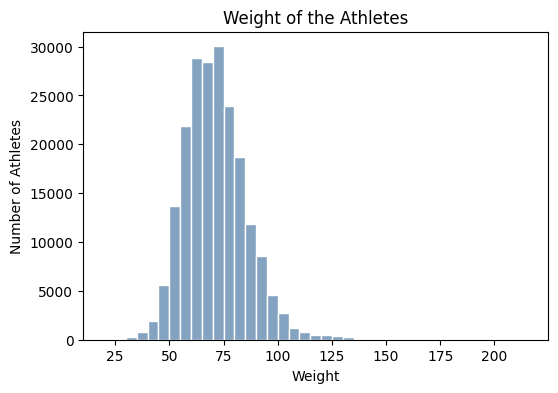

In [26]:
#Weight Demographics of the Athletes
plt.figure(figsize=(6, 4))
plt.title("Weight of the Athletes")
plt.xlabel('Weight')
plt.ylabel('Number of Athletes')
plt.hist(df_final.Weight, bins = np.arange(20,220,5), color=(0.2, 0.4, 0.6, 0.6), edgecolor='white')
plt.show()

In [27]:
df_final[df_final['Season'] == 'Summer']['Sport'].value_counts()

Sport
Athletics                32356
Swimming                 18662
Gymnastics               18267
Rowing                    7789
Cycling                   7774
Shooting                  7245
Fencing                   6537
Canoeing                  5548
Wrestling                 5186
Sailing                   4831
Equestrianism             4553
Football                  4443
Boxing                    4362
Hockey                    4264
Basketball                3668
Judo                      3364
Handball                  3319
Volleyball                3277
Weightlifting             2968
Water Polo                2719
Diving                    2011
Tennis                    2008
Archery                   1883
Table Tennis              1749
Badminton                 1343
Modern Pentathlon         1259
Synchronized Swimming      849
Baseball                   846
Rhythmic Gymnastics        615
Taekwondo                  596
Beach Volleyball           538
Triathlon                  526
So

In [28]:
df_final[df_final['Season'] == 'Winter']['Sport'].value_counts()

Sport
Cross Country Skiing         7529
Alpine Skiing                6322
Biathlon                     4615
Ice Hockey                   4561
Speed Skating                4400
Bobsleigh                    2205
Ski Jumping                  1966
Figure Skating               1510
Short Track Speed Skating    1488
Luge                         1377
Nordic Combined              1065
Snowboarding                  924
Freestyle Skiing              913
Curling                       410
Skeleton                      174
Name: count, dtype: int64

In [29]:
# Number of athletes in different sports
df_sports_participants = df_final.groupby(['Sport'])['ID'].count().sort_values(ascending=False)

In [30]:
df_sports_participants.head()

Sport
Athletics     32356
Swimming      18662
Gymnastics    18267
Rowing         7789
Cycling        7774
Name: ID, dtype: int64

In [31]:
df_sports_participants.tail()

Sport
Rugby               30
Tug-Of-War          20
Art Competitions    16
Lacrosse             2
Motorboating         1
Name: ID, dtype: int64

In [32]:
## when was Aeronautics introduced and how won

df_final[df_final['Sport'] == 'Aeronautics']


## Note

print("""
*** as per https://www.topendsports.com/events/demonstration/aeronautics.htm ***

The sport of Aeronautics, more accurately described as gliding, has been on the Olympic program only once, 
as a demonstration sport at the Berlin 1936 Olympic Games. No competition was held, 
just a demonstration of the sport by 14 pilots from seven countries on August 4th 1936.
     The sport involved a glider being launched from a bungee.
     There was one medal awarded in aeronautics at the 1936 Olympics - Swiss pilot Hermann Schreiber was awarded a gold medal
    for his flight across the Alps in 1935. 
     Many sources incorrectly join these pieces of information and claim that a gliding competition was held in 1936,
       with only one participant, Schreiber, who won the gold medal.
""")


*** as per https://www.topendsports.com/events/demonstration/aeronautics.htm ***

The sport of Aeronautics, more accurately described as gliding, has been on the Olympic program only once, 
as a demonstration sport at the Berlin 1936 Olympic Games. No competition was held, 
just a demonstration of the sport by 14 pilots from seven countries on August 4th 1936.
     The sport involved a glider being launched from a bungee.
     There was one medal awarded in aeronautics at the 1936 Olympics - Swiss pilot Hermann Schreiber was awarded a gold medal
    for his flight across the Alps in 1935. 
     Many sources incorrectly join these pieces of information and claim that a gliding competition was held in 1936,
       with only one participant, Schreiber, who won the gold medal.



In [33]:
# Popular sports - Gender wise

print("******* Male *************")
print(df_final[df_final['Sex'] == 'M'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).head())
print(df_final[df_final['Sex'] == 'M'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).tail())
print("\n")
print("******* Female *************")
print(df_final[df_final['Sex'] == 'F'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).head())
print(df_final[df_final['Sex'] == 'F'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).tail())


"""
irrespective of Gender
Athletics, Gymnastics and Swimming has the highest participation
"""

******* Male *************
Sport
Athletics     21379
Gymnastics    10696
Swimming      10250
Cycling        6436
Rowing         5667
Name: ID, dtype: int64
Sport
Rugby               30
Tug-Of-War          20
Art Competitions    16
Lacrosse             2
Motorboating         1
Name: ID, dtype: int64


******* Female *************
Sport
Athletics               10977
Swimming                 8412
Gymnastics               7571
Cross Country Skiing     3086
Alpine Skiing            2604
Name: ID, dtype: int64
Sport
Trampolining    75
Skeleton        65
Boxing          59
Golf            55
Ski Jumping     26
Name: ID, dtype: int64


'\nirrespective of Gender\nAthletics, Gymnastics and Swimming has the highest participation\n'

## Participation of female over the years

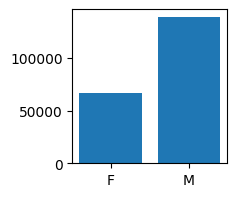

In [34]:
df_gender_distr = df_final.groupby('Sex')['ID'].count().reset_index()

plt.figure(figsize=(2,2))
plt.bar(df_gender_distr['Sex'], df_gender_distr['ID'])
plt.show()


Year
1920       1
1924       7
1928      56
1932      57
1936      88
1948     137
1952     417
1956     525
1994    1023
1998    1350
Name: ID, dtype: int64
********** Figure **********


<Axes: xlabel='Year'>

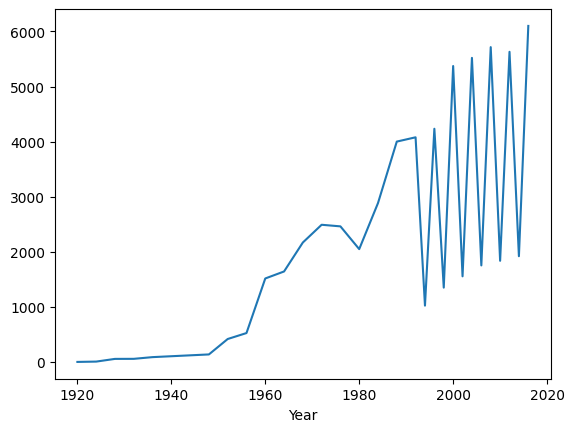

In [35]:

print(df_final[df_final['Sex'] == 'F'].groupby(['Year'])['ID'].count().sort_values().head(10))

print("*"*10,"Figure","*"*10)

df_final[df_final['Sex'] == 'F'].groupby(['Year'])['ID'].count().plot()

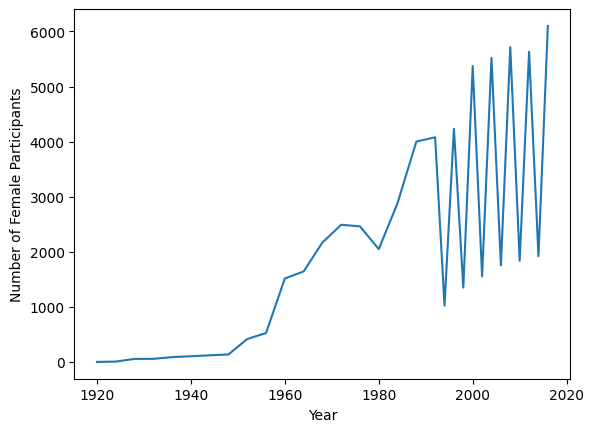

In [36]:
## using matplotlib same plot
df_wmn_prtcptn = df_final[df_final['Sex'] == 'F'].groupby(['Year'])['ID'].count().to_frame().reset_index()
df_wmn_prtcptn.rename(columns={'ID': 'Number of Women'}, inplace=True)
x_axis = df_wmn_prtcptn['Year']
y_axis = df_wmn_prtcptn['Number of Women']

plt.plot(x_axis, y_axis)
plt.xlabel('Year')
plt.ylabel('Number of Female Participants')
plt.show()

<Axes: xlabel='Year'>

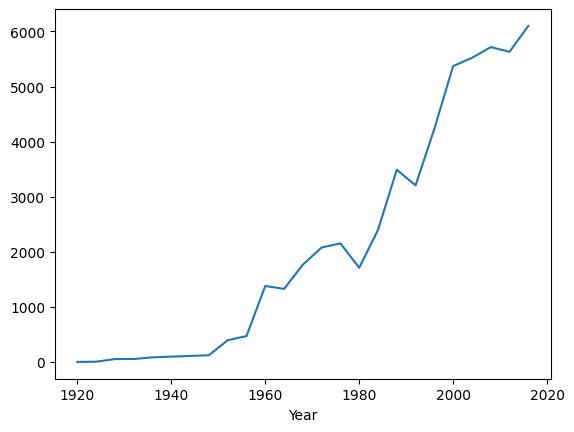

In [37]:
# exclude winter season

df_women_summer = df_final[(df_final['Sex'] == 'F') & (df_final['Season'] == 'Summer')].groupby(['Year'])['ID'].count()
df_women_summer.plot()

<Axes: xlabel='Year'>

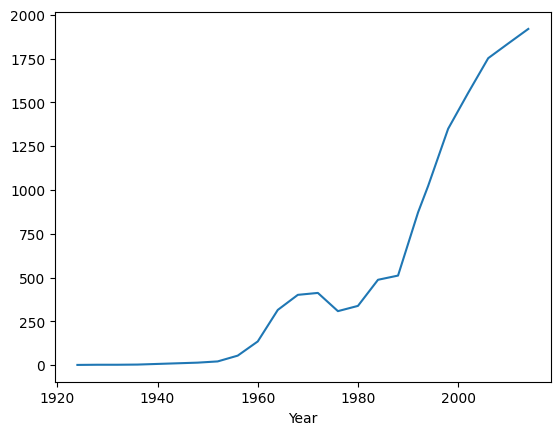

In [38]:
df_women_winter = df_final[(df_final['Sex'] == 'F') & (df_final['Season'] == 'Winter')].groupby(['Year'])['ID'].count()
df_women_winter.plot()

## country participation analysis

      region  Number of Participants
0        USA                   14207
1    Germany                   13183
2     Russia                   10398
3     France                    7975
4     Canada                    7966
5         UK                    7765
6      Italy                    7697
7      Japan                    7487
8  Australia                    6630
9     Poland                    5725


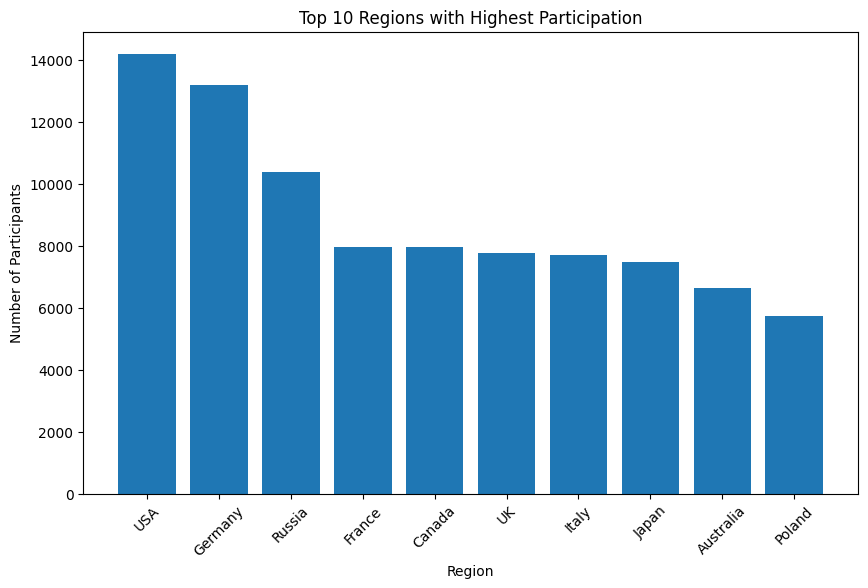

In [39]:
top_10_participation_regions = df_final.groupby('region')['ID'].count().sort_values(ascending=False).head(10)
top_10_participation_regions = top_10_participation_regions.to_frame().reset_index()
top_10_participation_regions.columns = ['region', 'Number of Participants']
print(top_10_participation_regions)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_participation_regions['region'], top_10_participation_regions['Number of Participants'])
plt.title('Top 10 Regions with Highest Participation')
plt.xlabel('Region')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Country-wise Medal Analysis | all medals

print(df_final[df_final['Medal'] != 0])
print()
print("*"*50)
top_10_medal_regions = df_final.groupby('region')['Medal'].count().nlargest(10)
top_10_medal_regions

            ID               Name Sex   Age  Height  Weight     Team  NOC   
8         3610          An Yulong   M  19.0   173.0    70.0    China  CHN  \
10        3610          An Yulong   M  19.0   173.0    70.0    China  CHN   
11        3610          An Yulong   M  23.0   173.0    70.0    China  CHN   
12        3611        An Zhongxin   F  23.0   170.0    65.0    China  CHN   
17        6381             Ba Yan   F  21.0   183.0    78.0    China  CHN   
...        ...                ...  ..   ...     ...     ...      ...  ...   
270486   48962       Hong Anh Tun   M  23.0   152.0    56.0  Vietnam  VIE   
270492   48966      Hong Xun Vinh   M  41.0   175.0    75.0  Vietnam  VIE   
270493   48966      Hong Xun Vinh   M  41.0   175.0    75.0  Vietnam  VIE   
270596  121646        Trn Hiu Ngn   F  26.0   157.0    47.0  Vietnam  VIE   
270693   58601  Majlinda Kelmendi   F  25.0   162.0    52.0   Kosovo  KOS   

              Games  Year  Season            City                      Spor

region
USA          14207
Germany      13183
Russia       10398
France        7975
Canada        7966
UK            7765
Italy         7697
Japan         7487
Australia     6630
Poland        5725
Name: Medal, dtype: int64

In [41]:
top_10_gold_medal_regions = df_final[df_final['Medal'] == 'Gold'].groupby('region')['Medal'].count().nlargest(10).to_frame().reset_index()
top_10_gold_medal_regions

,region,Medal
0,USA,2115
1,Russia,1465
2,Germany,1102
3,Canada,362
4,China,351
5,UK,330
6,Australia,319
7,Italy,315
8,Hungary,289
9,France,285


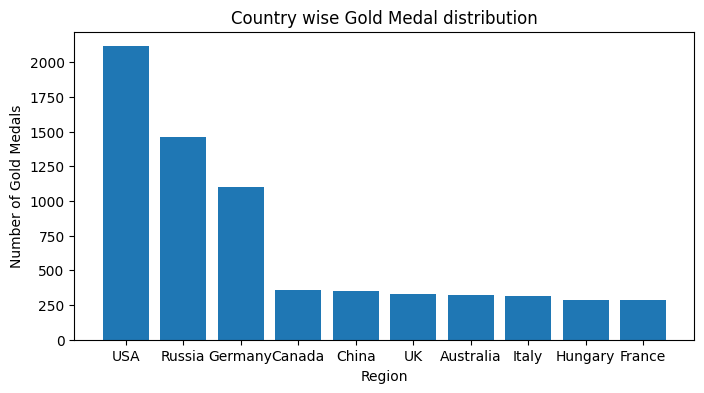

In [42]:
plt.figure(figsize = (8,4))
plt.title("Country wise Gold Medal distribution")
plt.xlabel('Region')
plt.ylabel('Number of Gold Medals')
plt.bar(top_10_gold_medal_regions['region'], top_10_gold_medal_regions['Medal'])
plt.show()

### New Feature | Gold Medal / Perticipation Number

In [43]:


df_participation_gold_medal = pd.merge(top_10_participation_regions,top_10_gold_medal_regions, left_on = 'region', right_on = 'region',how = 'inner')
df_participation_gold_medal['Medal/Number of Participants'] = df_participation_gold_medal['Number of Participants'] / df_participation_gold_medal['Medal']
df_participation_gold_medal.sort_values(by='Medal/Number of Participants', ascending=False)

,region,Number of Participants,Medal,Medal/Number of Participants
3,France,7975,285,27.982456
6,Italy,7697,315,24.434921
5,UK,7765,330,23.530303
4,Canada,7966,362,22.005525
7,Australia,6630,319,20.783699
1,Germany,13183,1102,11.962795
2,Russia,10398,1465,7.097611
0,USA,14207,2115,6.717258


### Best Athletes

In [44]:
df_best_athlts = df_final[df_final['Medal']=='Gold'].groupby(['ID','Name','region','Sport'])['Medal'].count().nlargest(10).reset_index()
df_best_athlts

,ID,Name,region,Sport,Medal
0,94406,"Michael Fred Phelps, II",USA,Swimming,23
1,33557,"Raymond Clarence ""Ray"" Ewry",USA,Athletics,10
2,67046,Larysa Semenivna Latynina (Diriy-),Russia,Gymnastics,9
3,69210,"Frederick Carlton ""Carl"" Lewis",USA,Athletics,9
4,87390,Paavo Johannes Nurmi,Finland,Athletics,9
5,113912,Mark Andrew Spitz,USA,Swimming,9
6,11642,"Matthew Nicholas ""Matt"" Biondi",USA,Swimming,8
7,11951,Ole Einar Bjrndalen,Norway,Biathlon,8
8,13029,Usain St. Leo Bolt,Jamaica,Athletics,8
9,35550,Birgit Fischer-Schmidt,Germany,Canoeing,8


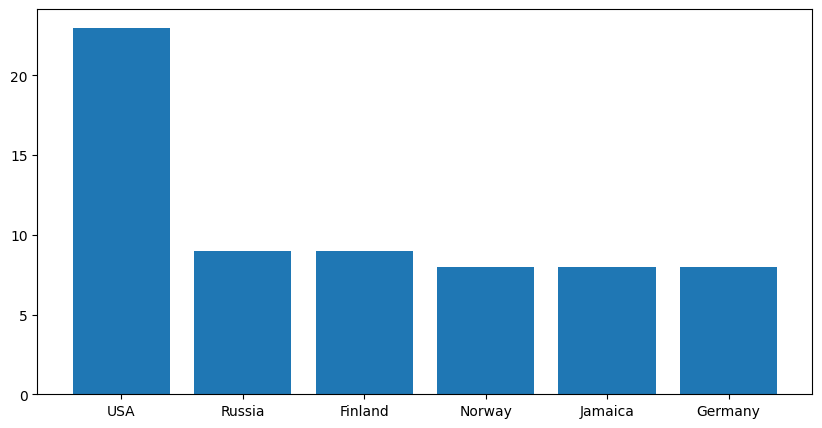

In [45]:
plt.figure(figsize=(10,5))
plt.bar(df_best_athlts['region'],df_best_athlts['Medal'])
plt.show()

In [46]:
# Excluding gold

df_best_athlts = df_final[df_final['Medal']!='Gold'].groupby(['ID','Name','region','Sport'])['Medal'].count().nlargest(10).reset_index()
df_best_athlts

,ID,Name,region,Sport,Medal
0,115354,"Joseph ""Josy"" Stoffel",Luxembourg,Gymnastics,38
1,106296,Heikki Ilmari Savolainen,Finland,Gymnastics,37
2,76437,Michel Mathiot,France,Gymnastics,31
3,129196,Andreas Wecker,Germany,Gymnastics,31
4,133279,Yordan Yovchev Yovchev,Bulgaria,Gymnastics,30
5,120051,Karl Tore William Thoresson,Sweden,Gymnastics,29
6,89187,Takashi Ono,Japan,Gymnastics,27
7,45219,Fabian Hambchen,Germany,Gymnastics,25
8,9255,"John Gilbert ""Jack"" Beckner",USA,Gymnastics,24
9,12678,Henri Louis Borio,France,Gymnastics,24


## Country wise, sports performance

In [47]:
df_final[df_final['region'] == 'USA'].groupby(['region','Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()

,region,Sport,Medal
3,USA,Athletics,2978
42,USA,Swimming,1322
22,USA,Gymnastics,1150
31,USA,Rowing,677
0,USA,Alpine Skiing,488


In [48]:
df_final[df_final['region'] == 'France'].groupby(['region','Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()

,region,Sport,Medal
3,France,Athletics,1121
21,France,Gymnastics,930
40,France,Swimming,633
16,France,Fencing,490
0,France,Alpine Skiing,375


In [49]:
df_final[df_final['region'] == 'Russia'].groupby(['region','Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()

,region,Sport,Medal
2,Russia,Athletics,1487
20,Russia,Gymnastics,1105
37,Russia,Swimming,855
10,Russia,Cross Country Skiing,494
15,Russia,Fencing,432


In [50]:
df_final[df_final['region'] == 'UK'].groupby(['region','Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()

,region,Sport,Medal
3,UK,Athletics,1643
40,UK,Swimming,958
21,UK,Gymnastics,710
30,UK,Rowing,503
13,UK,Cycling,367


### Age vs Medal

In [51]:
age, height, weight = df_final.groupby('Medal')['Age'].mean(), df_final.groupby('Medal')['Height'].mean(), df_final.groupby('Medal')['Weight'].mean()

In [52]:
age

Medal
0         24.993188
Bronze    25.492902
Gold      25.331104
Silver    25.463598
Name: Age, dtype: float64

In [53]:
height

Medal
0         174.988004
Bronze    177.359424
Gold      177.996656
Silver    177.579903
Name: Height, dtype: float64

In [54]:
weight

Medal
0         70.169602
Bronze    73.497831
Gold      74.134124
Silver    73.635368
Name: Weight, dtype: float64

In [55]:
# best performing nation
df_final[df_final['region'] == 'USA']['Age'].mean()

25.11022735271345

## Week-3

1. Dive Deeper

Look deeper into the features you are investigating, consider:

    Relationships / Correlation, Pearson Correlation

    Linear Regression for future prediction (if the relationship is linear)

    Textual Analysis for TF-IDF (Term Frequency-Inverse Document Frequency; Row-based and column-based, stop-word removal?

Specify 1-2 correlations you discovered. List the fields that you found to be correlated and describe what you learned from these correlations.





<br>

2. Go Broader 

Expand the features you are investigating. Look for connections/relationships that you may have initially missed.

    What jumps out at you now?

    Use the descriptive stats to point you to features that you may now want to consider.

What key terms did you discover in any text analysis, for whom? Any themes? If you are not analyzing text,
summarize what other things you are considering in your analysis?



<br>

3. New Metric

Create 1 or 2 new metrics to track relationships of data you discovered. Explain why you created them.

In [56]:
df_final.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,0,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",0,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,0,China,NaN


In [57]:
df_final[["Sex", "Age", "Height", "Weight", "Team", "Games", "Year", "Season", "Sport", "Medal"]]

,Sex,Age,Height,Weight,Team,Games,Year,Season,Sport,Medal
0,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Basketball,0
1,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,Judo,0
2,M,22.0,182.0,75.0,China,2000 Summer,2000,Summer,Boxing,0
3,M,25.0,160.0,62.0,China,2004 Summer,2004,Summer,Wrestling,0
4,F,14.0,168.0,54.0,China,2016 Summer,2016,Summer,Swimming,0
...,...,...,...,...,...,...,...,...,...,...
270760,F,22.0,170.0,49.0,Lesotho,2000 Summer,2000,Summer,Taekwondo,0
270762,F,23.0,150.0,56.0,Lesotho,2008 Summer,2008,Summer,Athletics,0
270763,F,27.0,150.0,56.0,Lesotho,2012 Summer,2012,Summer,Athletics,0
270765,M,23.0,170.0,63.0,Lesotho,1984 Summer,1984,Summer,Boxing,0


In [58]:
print(df_final.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')


In [59]:
## label encoding (order matters)


from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df_final[["Sex", "Age", "Height", "Weight", "region", "Sport","Medal"]].copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode non-numerical columns
non_numerical_columns = ['Sex','region', 'Sport','Medal']
for column in non_numerical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_final[column].astype(str))



# Compute the correlation matrix
correlation_matrix = df_encoded.corr()
correlation_matrix

,Sex,Age,Height,Weight,region,Sport,Medal
Sex,1.000000,0.160933,0.492363,0.514291,0.005368,-0.006186,-0.016495
Age,0.160933,1.000000,0.141754,0.211993,0.003049,-0.065640,0.025352
Height,0.492363,0.141754,1.000000,0.796610,0.004005,0.033711,0.082850
Weight,0.514291,0.211993,0.796610,1.000000,0.001747,0.084278,0.081514
region,0.005368,0.003049,0.004005,0.001747,1.000000,-0.024909,0.049163
Sport,-0.006186,-0.065640,0.033711,0.084278,-0.024909,1.000000,0.045676
Medal,-0.016495,0.025352,0.082850,0.081514,0.049163,0.045676,1.000000


In [156]:
## one-hot encoding (order not matters)


# Perform one-hot encoding
df_encoded = pd.get_dummies(df_final[["Sex", "Age", "Height", "Weight", "region", "Sport","Medal"]], columns=['Sex','region', 'Sport','Medal'])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()
correlation_matrix

,Age,Height,Weight,Sex_F,Sex_M,region_Afghanistan,region_Albania,region_Algeria,region_American Samoa,region_Andorra,...,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_0,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,0.141754,0.211993,-0.160933,0.160933,-0.004602,0.000360,-0.005111,0.002791,-0.005356,...,0.026196,0.002595,0.004179,0.013695,0.005106,0.018305,-0.028112,0.018107,0.011398,0.016641
Height,0.141754,1.000000,0.796610,-0.492363,0.492363,-0.007348,-0.003751,-0.003144,0.000277,-0.004065,...,-0.008334,0.006703,0.139890,0.105939,-0.086659,-0.045099,-0.089132,0.042777,0.056595,0.046837
Weight,0.211993,0.796610,1.000000,-0.514291,0.514291,-0.005177,0.000577,-0.006842,0.011682,-0.000091,...,-0.031326,0.014503,0.072751,0.111893,0.075521,0.054999,-0.088459,0.044480,0.054642,0.045977
Sex_F,-0.160933,-0.492363,-0.514291,1.000000,-1.000000,-0.007993,0.004096,-0.014533,-0.000815,-0.003920,...,0.018689,-0.006815,0.036093,-0.035603,-0.043639,-0.091066,-0.017144,0.009113,0.007133,0.011920
Sex_M,0.160933,0.492363,0.514291,-1.000000,1.000000,0.007993,-0.004096,0.014533,0.000815,0.003920,...,-0.018689,0.006815,-0.036093,0.035603,0.043639,0.091066,0.017144,-0.009113,-0.007133,-0.011920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sport_Wrestling,0.018305,-0.045099,0.054999,-0.091066,0.091066,0.045251,0.004778,0.001852,0.001446,-0.004117,...,-0.008135,-0.001584,-0.020442,-0.018595,-0.019440,1.000000,-0.018147,0.013820,0.008147,0.007780
Medal_0,-0.028112,-0.089132,-0.088459,-0.017144,0.017144,0.005015,0.006895,0.015784,0.004185,0.010614,...,0.012809,-0.007064,-0.052431,-0.043979,-0.011070,-0.018147,1.000000,-0.549370,-0.549997,-0.541291
Medal_Bronze,0.018107,0.042777,0.044480,0.009113,-0.009113,-0.000915,-0.003788,-0.008226,-0.002299,-0.005831,...,-0.007075,0.002310,0.028610,0.023009,0.005041,0.013820,-0.549370,1.000000,-0.051879,-0.051058
Medal_Gold,0.011398,0.056595,0.054642,0.007133,-0.007133,-0.003691,-0.003792,-0.008706,-0.002302,-0.005838,...,-0.007093,0.011402,0.027622,0.026463,0.006669,0.008147,-0.549997,-0.051879,1.000000,-0.051116


In [60]:
## Linear Regression Model for prediction

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [61]:
# split the data

X = df_final[['Age', 'Height', 'Weight']]
y = df_final[['Medal']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [63]:
# model Building

model = LinearRegression()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Gold'